In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Teste se funcionaria prever o Ideb do ano seguinte (ou 2 anos no futuro no caso). Primeiro vamos ver se conseguimos prever Ideb2009 com as informações disponíveis no Escolas 2007.

In [4]:
esc07_numfeatures = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\esc07_numfeatures.csv')
esc07_target = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\esc07_target.csv')
esc07_target2 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\esc07_target2.csv')

Houve um erro no write/load da database, e o primeiro valor foi considerado como Key da coluna, posso consertar rapidamente assm:

In [5]:
esc07_target = esc07_target['4.1']

In [6]:
esc07_target.loc[-1] = 4.1
esc07_target.index = esc07_target.index + 1
esc07_target = esc07_target.sort_index()

In [7]:
esc07_target.shape

(58130,)

In [8]:
esc07_numfeatures.shape

(58130, 58)

Dfs com tamanhos certos, podemos partir para o último pré processamento dos dados, tirando as informações desnecessárias para o modelo.

In [9]:
esc07_numfeatures.drop(columns=['ano_censo'],inplace=True)
esc07_numfeatures.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
esc07_feat_scaled = scale(esc07_numfeatures)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [11]:
esc07_feat_scaled.shape

(58130, 56)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(esc07_feat_scaled,esc07_target,random_state=137)

In [63]:
model_07 = Sequential()
n_cols = esc07_feat_scaled.shape[1]
model_07.add(Dense(110,activation='relu',input_shape = (n_cols,)))
model_07.add(Dense(35,activation='relu',input_shape = (n_cols,)))
#model_07.add(Dense(25,activation='relu',input_shape = (n_cols,)))
model_07.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [64]:
model_07.compile(optimizer='adam',loss='mean_squared_error')
model_07.fit(X_train,y_train,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=256)

Train on 34877 samples, validate on 8720 samples
Epoch 1/100
34877/34877 [==============================] - 1s 34us/step - loss: 2.5529 - val_loss: 0.6413
Epoch 2/100
34877/34877 [==============================] - 0s 12us/step - loss: 0.5697 - val_loss: 0.4231
Epoch 3/100
34877/34877 [==============================] - 0s 12us/step - loss: 0.3965 - val_loss: 0.3769
Epoch 4/100
34877/34877 [==============================] - 0s 12us/step - loss: 0.3454 - val_loss: 0.3521
Epoch 5/100
34877/34877 [==============================] - 0s 12us/step - loss: 0.3275 - val_loss: 0.3440
Epoch 6/100
34877/34877 [==============================] - 0s 12us/step - loss: 0.3185 - val_loss: 0.3341
Epoch 7/100
34877/34877 [==============================] - 0s 12us/step - loss: 0.3117 - val_loss: 0.3309
Epoch 8/100
34877/34877 [==============================] - 0s 13us/step - loss: 0.3080 - val_loss: 0.3288
Epoch 9/100
34877/34877 [==============================] - 0s 13us/step - loss: 0.3051 - val_loss: 0.32

In [65]:
model_07.evaluate(X_test,y_test)

14533/14533 [==============================] - 0s 25us/step


0.3101602062087734

In [66]:
Ideb2009_pred = model_07.predict(X_test)

In [67]:
Ideb2009_pred[:,0].shape

(14533,)

In [68]:
Ideb2009_pred_series = pd.Series(data=Ideb2009_pred[:,0])

In [101]:
Ideb2009_pred_series.describe()

count    14533.000000
mean         4.240285
std          0.874101
min          1.447751
25%          3.585613
50%          4.180947
75%          4.862754
max          8.174009
dtype: float64

In [69]:
y_test = y_test.reset_index(drop=True)

Arrumar a Predição e os valores reais numa df para melhor visualizar

In [102]:
out = pd.DataFrame()
out['True'] = y_test
out['Pred'] = Ideb2009_pred_series


Criar mais um train_test_split com o não Scaled vetor de features, para que possamos pegar o valor do Ideb2007

In [95]:
X_tr, X_t, y_tr, y_t = train_test_split(esc07_numfeatures,esc07_target,random_state=137)

In [131]:
X_tr.columns

Index(['tp_dependencia', 'num_matriculas', 'num_estudantes',
       'num_estudantes_ensino_infantil',
       'num_estudantes_ensino_fund_anos_iniciais',
       'num_estudantes_ensino_fund_anos_finais', 'num_estudantes_fund_1_ano',
       'num_estudantes_fund_2_ano', 'num_estudantes_fund_3_ano',
       'num_estudantes_fund_4_ano', 'num_estudantes_fund_5_ano',
       'num_estudantes_fund_6_ano', 'num_estudantes_fund_7_ano',
       'num_estudantes_fund_8_ano', 'num_estudantes_fund_9_ano',
       'num_estudantes_medio_1_serie', 'num_estudantes_medio_2_serie',
       'num_estudantes_medio_3_serie', 'num_turmas', 'tp_localizacao',
       'num_salas_existentes', 'num_salas_utilizadas', 'num_equip_tv',
       'num_equip_videocassete', 'num_equip_dvd', 'num_equip_parabolica',
       'num_equip_copiadora', 'num_equip_retroprojetor',
       'num_equip_impressora', 'num_equip_impressora_mult', 'num_equip_som',
       'num_equip_multimidia', 'num_equip_fax', 'num_equip_foto',
       'num_computador

In [103]:
out['Ideb2007'] = X_t['Ideb2007'].reset_index(drop=True)

In [110]:
out['Pred_dif'] = out['Pred'] - out['Ideb2007']
out['True_dif'] = out['True'] - out['Ideb2007']

A predição teve um erro relativamente baixo comparado com o real valor, mas ainda tem vários casos no qual erra a predição substancialmente.

Para a predição de valores futuros (2017+) também veremos a diferença entre o atual valor e o valor predizido, para percebemos quais escolas tendem a melhorar ou piorar no curto prazo. Aqui fiz um mock-up de como veriamos isso.

In [111]:
out


,True,Pred,Ideb2007,dif,Pred_dif,True_dif
0,4.2,3.906988,3.8,0.106988,0.106988,0.4
1,4.5,4.491556,4.4,0.091556,0.091556,0.1
2,6.0,5.667313,5.4,0.267313,0.267313,0.6
3,5.0,3.972608,3.8,0.172608,0.172608,1.2
4,5.8,5.099485,4.3,0.799485,0.799485,1.5
5,3.6,3.714979,3.2,0.514979,0.514979,0.4
6,3.8,3.789875,3.5,0.289875,0.289875,0.3
7,3.8,3.422372,3.1,0.322372,0.322372,0.7
8,3.1,3.979629,3.2,0.779629,0.779629,-0.1
9,6.1,4.536898,5.1,-0.563102,-0.563102,1.0


In [113]:
mean_squared_error(out['Pred_dif'],out['True_dif'])

0.31016020642839914

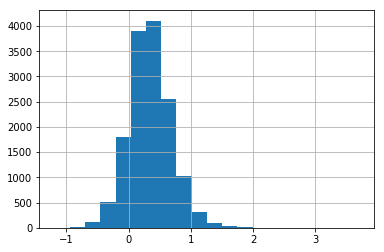

In [134]:
out['Pred_dif'].hist(bins =20)

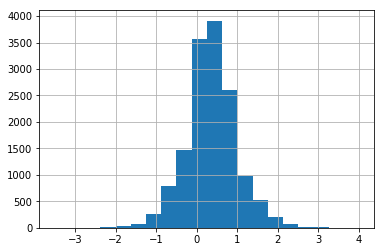

In [135]:
out['True_dif'].hist(bins = 20)

In [133]:
out

,True,Pred,Ideb2007,dif,Pred_dif,True_dif
0,4.2,3.906988,3.8,0.106988,0.106988,0.4
1,4.5,4.491556,4.4,0.091556,0.091556,0.1
2,6.0,5.667313,5.4,0.267313,0.267313,0.6
3,5.0,3.972608,3.8,0.172608,0.172608,1.2
4,5.8,5.099485,4.3,0.799485,0.799485,1.5
5,3.6,3.714979,3.2,0.514979,0.514979,0.4
6,3.8,3.789875,3.5,0.289875,0.289875,0.3
7,3.8,3.422372,3.1,0.322372,0.322372,0.7
8,3.1,3.979629,3.2,0.779629,0.779629,-0.1
9,6.1,4.536898,5.1,-0.563102,-0.563102,1.0


obs: Deveria manter o 'Cod_Escola_Completo' até o último segundo para depois poder checar quais escolas que tiveram as predições mais positivas

Agora vou tentar a mesma ideia, porem fazendo um PCA() nas entradas, para tentar chegar a dimensão intrínseca do problema

In [139]:
pca = PCA()
pca.fit(esc07_feat_scaled)
transformed = pca.transform(esc07_feat_scaled)

In [142]:
pca_feat = range(pca.n_components_)

<BarContainer object of 56 artists>

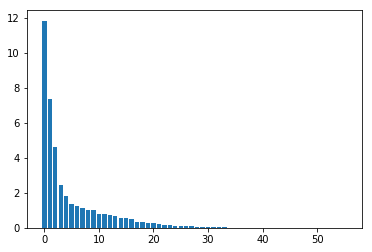

In [143]:
plt.bar(pca_feat,pca.explained_variance_)

Vou usar os primeiros 10 componentes que possuem maior variancia

In [144]:
pca_t = PCA(n_components=10)

In [146]:
pca_t.fit(esc07_feat_scaled)
transformed_t = pca_t.transform(esc07_feat_scaled)

In [150]:
pca_t.n_components_

10

In [151]:
pca_t

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [152]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(transformed_t,esc07_target,random_state=137)

In [155]:
model_pca = Sequential()
n_cols = transformed_t.shape[1]
model_pca.add(Dense(50,activation='relu',input_shape = (n_cols,)))
model_pca.add(Dense(20,activation='relu',input_shape = (n_cols,)))
#model_pca.add(Dense(25,activation='relu',input_shape = (n_cols,)))
model_pca.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [156]:
model_pca.compile(optimizer='adam',loss='mean_squared_error')
model_pca.fit(X_train_pca,y_train_pca,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=256)

Train on 34877 samples, validate on 8720 samples
Epoch 1/100
34877/34877 [==============================] - 1s 31us/step - loss: 2.3842 - val_loss: 0.8896
Epoch 2/100
34877/34877 [==============================] - 0s 8us/step - loss: 0.6996 - val_loss: 0.5781
Epoch 3/100
34877/34877 [==============================] - 0s 7us/step - loss: 0.5024 - val_loss: 0.4598
Epoch 4/100
34877/34877 [==============================] - 0s 8us/step - loss: 0.4288 - val_loss: 0.4164
Epoch 5/100
34877/34877 [==============================] - 0s 7us/step - loss: 0.3973 - val_loss: 0.3945
Epoch 6/100
34877/34877 [==============================] - 0s 8us/step - loss: 0.3804 - val_loss: 0.3819
Epoch 7/100
34877/34877 [==============================] - 0s 8us/step - loss: 0.3692 - val_loss: 0.3769
Epoch 8/100
34877/34877 [==============================] - 0s 7us/step - loss: 0.3617 - val_loss: 0.3700
Epoch 9/100
34877/34877 [==============================] - 0s 8us/step - loss: 0.3560 - val_loss: 0.3686
Epoch

In [158]:
Ideb2009_pred_pca = model_pca.predict(X_test_pca)
Ideb2009_pred_pca_series = pd.Series(data=Ideb2009_pred_pca[:,0])

In [159]:
out['Pred_pca'] = Ideb2009_pred_pca_series

In [160]:
out

,True,Pred,Ideb2007,dif,Pred_dif,True_dif,Pred_pca
0,4.2,3.906988,3.8,0.106988,0.106988,0.4,4.070238
1,4.5,4.491556,4.4,0.091556,0.091556,0.1,4.939109
2,6.0,5.667313,5.4,0.267313,0.267313,0.6,5.717697
3,5.0,3.972608,3.8,0.172608,0.172608,1.2,4.147710
4,5.8,5.099485,4.3,0.799485,0.799485,1.5,5.130852
5,3.6,3.714979,3.2,0.514979,0.514979,0.4,3.709611
6,3.8,3.789875,3.5,0.289875,0.289875,0.3,4.027048
7,3.8,3.422372,3.1,0.322372,0.322372,0.7,3.551773
8,3.1,3.979629,3.2,0.779629,0.779629,-0.1,4.088006
9,6.1,4.536898,5.1,-0.563102,-0.563102,1.0,4.656208


Usando apenas 10 features tive um resultado comparável a usar os 56 features iniciais, caso opte por no modelo geral adicionar toda a informação dos anos passados, posso simplificar fazendo um PCA de cada ano, e a entrada seria um merge de todos os PCAs